Write a program to zoom images by a given factor s ∈ [0,10]. You must use a function to zoom the image,
which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation
I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by
computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a
factor of 4 by comparing with the original images. 

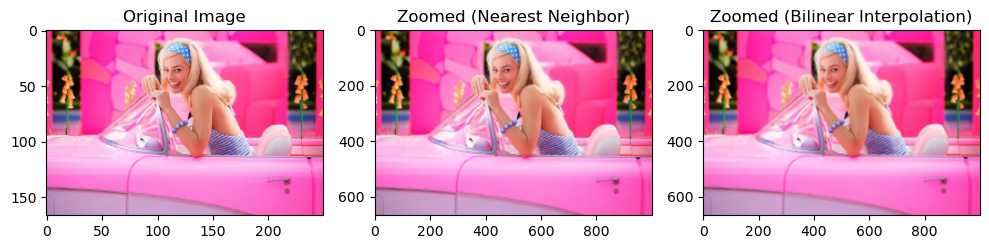

ValueError: operands could not be broadcast together with shapes (668,1000,3) (500,750,3) 

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the small image
img = cv.imread('images/im11small.png')

def zoom_nearest_neighbor(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = int(i / factor)
            orig_j = int(j / factor)
            zoomed_image[i, j] = image[orig_i, orig_j]
    
    return zoomed_image



def zoom_bilinear(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = i / factor
            orig_j = j / factor
            
            i1, i2 = int(np.floor(orig_i)), int(np.ceil(orig_i))
            j1, j2 = int(np.floor(orig_j)), int(np.ceil(orig_j))
            
            i1 = max(0, min(i1, h - 1))  # Ensure indices stay within image boundaries
            i2 = max(0, min(i2, h - 1))
            j1 = max(0, min(j1, w - 1))
            j2 = max(0, min(j2, w - 1))
            
            # Bilinear interpolation
            value = (1 - (orig_i - i1)) * (1 - (orig_j - j1)) * image[i1, j1] + \
                    (1 - (orig_i - i1)) * (orig_j - j1) * image[i1, j2] + \
                    (orig_i - i1) * (1 - (orig_j - j1)) * image[i2, j1] + \
                    (orig_i - i1) * (orig_j - j1) * image[i2, j2]
            
            zoomed_image[i, j] = value.astype(np.uint8)
    
    return zoomed_image

# Zoom factor
zoom_factor = 4.0  # Change this to the desired zoom factor

# Zoom using nearest-neighbor
zoomed_nn = zoom_nearest_neighbor(img, zoom_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(img, zoom_factor)

# Display the results using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
plt.title('Zoomed (Nearest Neighbor)')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
plt.title('Zoomed (Bilinear Interpolation)')

plt.tight_layout()
plt.show()

# Compute the normalized sum of squared difference (SSD)
small_image = cv.imread('images/im11small.png')
original_image = cv.imread('images/im11.png')

# Scale factor
scale_factor = 4.0

# Zoom the small image
scaled_nn = zoom_nearest_neighbor(small_image, scale_factor)
scaled_bilinear = zoom_bilinear(small_image, scale_factor)

def compute_normalized_ssd(image1, image2):
    pixel_difference = image1 - image2
    squared_pixel_difference = pixel_difference ** 2
    sum_of_squared_differences = np.sum(squared_pixel_difference)
    normalized_ssd = sum_of_squared_differences / (image1.size * 255 ** 2)
    return normalized_ssd




# Normalize SSD values
normalized_ssd_nn = compute_normalized_ssd(scaled_nn,original_image)
normalized_ssd_bilinear = compute_normalized_ssd(scaled_bilinear,original_image)

# Print the normalized SSD values
print(f"Normalized SSD (Nearest Neighbor): {normalized_ssd_nn}")
print(f"Normalized SSD (Bilinear Interpolation): {normalized_ssd_bilinear}")
